<a href="https://colab.research.google.com/github/brighamfrandsen/econ484/blob/master/examples/03%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import necessary libraries

!git clone https://github.com/brighamfrandsen/econ484.git
%cd econ484/utilities
from preamble import *
%cd ../data

plt.rcParams['image.cmap'] = "gray"

## Principal Components Analysis

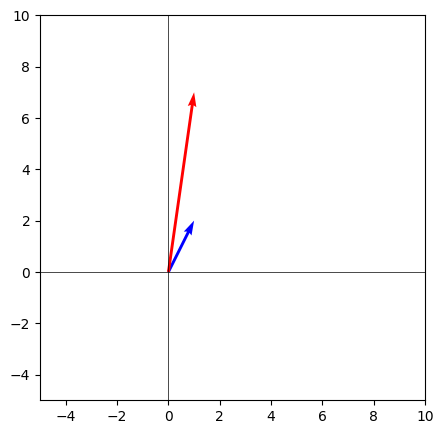

In [3]:
# Illustration of matrices rotating
import numpy as np
import matplotlib.pyplot as plt

# Define a vector
v = np.array([1, 2])

# Define a symmetric 2x2 matrix
A = np.array([[-1, 1],
              [1, 3]])

# Multiply
Av = A @ v

# Plot
plt.figure(figsize=(5,5))
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 10)
plt.ylim(-5, 10)

# Original vector
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v')

# Transformed vector
plt.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1, color='red', label='A·v')

### Motivation: Too many regressors to run a regression:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
housedata=pd.read_csv('housingprices.csv',nrows=10)
print(housedata.head())
print("Shape: {}".format(str(housedata.shape)))

In [ ]:
x=housedata.loc[:,[j for j in housedata.columns if j not in ('price','lprice')]]
print(x.head())

In [ ]:
y=housedata.loc[:,'price']

In [ ]:
# Instantiate a model object:
lm = linear_model.LinearRegression()
# Fit the model:
lm.fit(x,y)

lm.coef_

The huge coefficients are evidence that the X'X matrix is not full rank here

Let's see if we can fix this using PCA. Let's just keep first 3 components. Before doing PCA, always standardize your variables

In [ ]:
# print out summary statistics of original x :
x.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Instantiate a "scaler" object:
scaler = StandardScaler()
# calculate means and standard deviations of columns of x:
scaler.fit(x)

# subtract off means, divide by std devs:
x_scaled = scaler.transform(x)

print(x_scaled.shape)
pd.DataFrame(x_scaled).describe()


In [ ]:
from sklearn.decomposition import PCA
# keep the first three principal components of the data
pca = PCA(n_components=3)
# calculates factor loadings
pca.fit(x_scaled)

# transform data onto the first three principal components
x_pca = pca.transform(x_scaled)
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

print("PCA components:\n{}".format(pca.components_))
x_pca


Now re-run the regression!

In [ ]:
# Do on your own, and print out the coefficients


#Cheat

In [ ]:
model = lm.fit(x_pca,y)
model.coef_

# Obtain predicted prices:

In [ ]:
predicted_prices =lm.predict(x_pca)
predicted_prices

In [ ]:
lm.predict([[-3,0,1]])

#Some even cooler stuff you can do with PCA

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

### Dimensionality Reduction, Feature Extraction and Manifold Learning
#### Principal Component Analysis (PCA)

In [ ]:
mglearn.plots.plot_pca_illustration()

##### Applying PCA to the cancer dataset for visualization

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [ ]:
# calculate means and std devs:
scaler.fit(cancer.data)
# creates standardized variables:
X_scaled = scaler.transform(cancer.data)

In [ ]:
#from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

In [ ]:
print("PCA components:\n{}".format(pca.components_))

In [ ]:
# regress cancer indicator on (30 characteristics) and then (2 PC)
y =cancer.target
lm.fit(X_scaled,y)
lm.score(X_scaled,y)

In [ ]:
# same thing but with only 2 PCs
lm.fit(X_pca,y)
lm.score(X_pca,y)

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

##### Eigenfaces for feature extraction

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

In [ ]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

In [ ]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
#X_people = X_people / 255.

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)
X_pca = pca.transform(X_people)

print("X_pca.shape: {}".format(X_pca.shape))

In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

![decomposition](https://github.com/brighamfrandsen/econ484/blob/master/examples/images/03-face_decomposition.png?raw=1)

In [ ]:
mglearn.plots.plot_pca_faces(X_people, X_people,image_shape)